## Dataset Generation

In [2]:
import pandas as pd
import numpy as np

In [88]:
np.random.seed(42)

n = 200

df = pd.DataFrame({
    "study_hours": np.random.normal(10, 4, n),
    "attendance": np.random.normal(70, 10, n),
    "previous_test_score": np.random.randint(30, 101, n),
    "group_discussion": np.where(np.random.random(n) > 0.5, "Yes", "No")
})

final_exam_score = []

for i in range(n):
    if (df["study_hours"][i] >= 6 and
        df["attendance"][i] >= 0 and
        df["previous_test_score"][i] >= 50):
        final_exam_score.append('Pass')
    else:
        final_exam_score.append('Fail')
        

df["final_exam_pass"] = final_exam_score

df["study_hours"] = df["study_hours"].clip(1, 10).round()
df["attendance"] = df["attendance"].clip(1, 100).round()

df.to_csv("dataset.csv", index=False)

df.head()

,study_hours,attendance,previous_test_score,group_discussion,final_exam_pass
0,10.0,74.0,30,Yes,Fail
1,9.0,76.0,50,No,Pass
2,10.0,81.0,84,No,Pass
3,10.0,81.0,35,No,Fail
4,9.0,56.0,98,No,Pass


### 1. Understanding the Basic

#### What is Probability?

probability means the chance that something will happen.

It is a number between **0 and 1**.

- probability = 0 -> the event will never happen
- probability = 1 -> the event will surely happen

#### Key Probability Terms

**Experiment** -> 
An action that gives an uncertain result.
example: Selecting a student from the dataset.

**Outcome** -> 
The result of an experiment.
example: pass or fail.

**Sample Space** -> 
ALL possible outcomes.
examle:{pass, fail}

**Event** -> 
A specific outcome we are interested in.
exaple: student passes the exam.

#### Three probability event examples from the dataset.

1. Probability that a student pass the final exam.
2. Probability that a student study 10 or more hours.
3. Probability that a student pass the exam if they join group discussion


In [42]:
p_pass = (df["final_exam_pass"] == "Pass").mean()
print(f"Probability of passing the final exam: {p_pass:.2f}")

Probability of passing the final exam: 0.56


In [43]:
p_study_10 = (df["study_hours"] >= 10).mean()
print(f"Probability of studying 10 hours or more: {p_study_10:.2f}")

Probability of studying 10 hours or more: 0.55


In [45]:
p_pass_group_discussion = (df[df["group_discussion"] == "Yes"]["final_exam_pass"] == "Pass").mean()
print(f"Probability of passing the final exam with group discussion: {p_pass_group_discussion:.2f}")

Probability of passing the final exam with group discussion: 0.53


### 2. Types of Events

In probability, events can be of two main types:
1. Theoretical Probability
2. Empirical Probability

#### Theoretical Probability

Theoretical probability is based on logic and assumptions.
It is calculated **before** looking at real data.

**Example:**  
Probability that a student passes the exam  
= (Number of students who passed) / (Total number of students)

#### Empirical Probability

Empirical probability is calculated using real data.
It is based on observation and actual results.

**Example:**  
If we assume equal chance of pass and fail:  
Probability = 1 / 2 = 0.5

In [46]:
p_emprical_pass = (df["final_exam_pass"] == "Pass").sum() / len(df)
print(f"Empirical probability of passing the final exam: {p_emprical_pass:.2f}")

p_theoretical_pass = 0.75
print(f"Theoretical probability of passing the final exam: {p_theoretical_pass:.2f}")

Empirical probability of passing the final exam: 0.56
Theoretical probability of passing the final exam: 0.75


### 3. Random Variable & Probability Distribution

#### Random Variable

A random variable is a variable whose value depends on the outcome of a random event.

Let:
X = Number of students who pass the final exam  
when **3 students are selected randomly**.

## Possible Values of X

Since we select 3 students, the number of students who pass can be:

X = 0 → No student passes  
X = 1 → One student passes  
X = 2 → Two students pass  
X = 3 → All three students pass

In [47]:
# Probability that a student passes the exam (empirical probability)
p = (df["final_exam_pass"] == "Pass").mean()
p


np.float64(0.555)

### Probability Distribution

The random variable X follows a **Binomial Distribution** because:
- There are fixed trials (3 students)
- Each student can Pass or Fail
- Probability of passing is constant
- Students are selected randomly

#### Mean of Random Variable
The mean shows the **average expected value**.

#### Variance of Random Variable
Variance shows **how much the values spread from the mean**.


In [51]:
counts = df["final_exam_pass"].value_counts()

probability_distribution = (counts / len(df))
probability_distribution.columns = ["final_exam_pass", "probability"]

print(probability_distribution)

final_exam_pass
Pass    0.555
Fail    0.445
Name: count, dtype: float64


In [48]:
mean = df["study_hours"].mean()
variance = df["study_hours"].var()

print(f"Mean study hours: {mean:.2f}")
print(f"Variance of study hours: {variance:.2f}")

Mean study hours: 8.44
Variance of study hours: 4.85


### 4. Venn Diagram in Probability

A Venn diagram is used to show relationships between different groups.

In this diagram, we consider two events:

**Event A:** Students who study more than 10 hours per week  
**Event B:** Students who attend more than 80% of classes 

#### Intersection (A ∩ B)
Students who:
- Study more than 10 hours  
- AND attend more than 80%  

This overlap represents students satisfying **both conditions**.


In [64]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

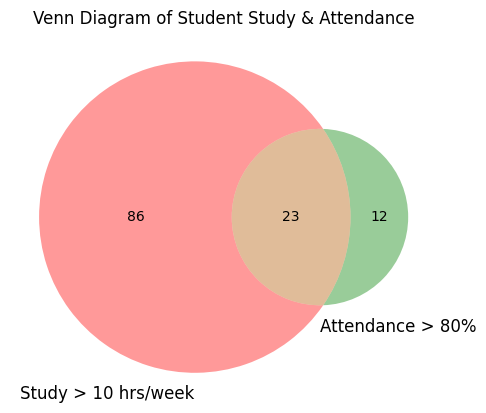

<Figure size 640x480 with 0 Axes>

In [97]:
study_10 = (df["study_hours"] >= 10)
attendance_80 = (df["attendance"] >= 80)

only_study = ((study_10) & (~attendance_80)).sum()
only_attendance = ((~study_10) & (attendance_80)).sum()
both = ((study_10) & (attendance_80)).sum()

venn2(subsets=(only_study, only_attendance, both),
      set_labels=('Study > 10 hrs/week', 'Attendance > 80%'))

plt.title("Venn Diagram of Student Study & Attendance")
plt.show()

plt.savefig("venn_diagram.png")


### 5. Contingency Table & Probability Calculations

#### Contingency Table

**Group Discussion vs Final Exam Result**

The dataset contains information about 200 students with the following variables:
- group_discussion (Yes / No)
- final_exam_pass (Pass / Fail)

The final exam result is generated based on study hours, attendance, and previous test score.


In [ ]:
#Contingency Table

contingency_table = pd.crosstab(
    df["final_exam_pass"], 
    df["group_discussion"])

print(contingency_table)

group_discussion  No  Yes
final_exam_pass          
Fail              38   51
Pass              53   58


#### Joint Probability
Probability that a student:
- Participates in group discussion  
- AND passes the final exam

In [83]:
# joint Probability

joint_prob = contingency_table / contingency_table.values.sum()
print(joint_prob)

group_discussion     No    Yes
final_exam_pass               
Fail              0.190  0.255
Pass              0.265  0.290


### Marginal Probability
Probability that a student **passes the exam**,  
ignoring group discussion.

In [84]:
# Marginal Probability

marginal_probability = contingency_table.sum() / contingency_table.values.sum()
print(marginal_probability)

group_discussion
No     0.455
Yes    0.545
dtype: float64


### Conditional Probability
Probability that a student **passes the exam given**  
they participated in group discussion.

P(Pass | Group Discussion)

In [90]:
#Conditional probability

Conditional_probability = len(
    df[
        (df["group_discussion"] == "Yes") &
        (df["final_exam_pass"] == "Pass")
    ]
)

group_yes = len(df[df["group_discussion"] == "Yes"])

conditional_probability = Conditional_probability / group_yes

print(f"Conditional Probability of passing the final exam given group discussion: {conditional_probability:.2f}")

Conditional Probability of passing the final exam given group discussion: 0.53


### Understanding Relationships


#### Conditional Probability

Conditional probability means **chance of something happening when we already know something else happened**.

In this case:

- We check the chance of **passing the exam**
- when the student **joined group discussions**

This answers the question:

**“If a student joins group discussions, how likely is the student to pass the exam?”**

Here, we do NOT look at all students.
We look **only at students who joined group discussions**.

Conclusion

- Conditional probability shows the effect of one event on another
- Passing the exam depends on group discussion participation
- The events are:
  - Not mutually exclusive
  - Not independent
  - DEPENDENT events


In [ ]:
total_students = len(df)

P_pass = len(df[df["final_exam_pass"] == "Pass"]) / total_students
P_yes = len(df[df["group_discussion"] == "Yes"]) / total_students

P_yes_and_pass = len(df[(df["group_discussion"]=="Yes") & (df["final_exam_pass"]=="Pass")]) / total_students

print(f"\nP(Yes) = {P_yes:.2f}")
print(f"P(Pass) = {P_pass:.2f}")    
print(f"P(Yes AND Pass) = {P_yes_and_pass:.2f}")

if abs(P_yes_and_pass - (P_yes * P_pass)) < 0.01:
    print("Events are Independent")
else:
    print("Events are Dependent")


P(Yes) = 0.55
P(Pass) = 0.56
P(Yes AND Pass) = 0.29
Events are Dependent


### 7 Bayes Theorem Application


#### Given Information
- 70% of students who passed had high attendance  
- 40% of students who failed had high attendance  
- 60% of all students had high attendance

#### Bayes Theorem Formula

P(Pass | High Attendance)  
= [P(High Attendance | Pass) × P(Pass)] / P(High Attendance)

#### Interpretation
Students with **high attendance** have a **higher probability of passing the exam**.


In [96]:
attendance = df["attendance"] > 85
exam_pass = df["final_exam_pass"] == "Pass"

p_pass = exam_pass.sum() / len(df)
p_attendance = attendance.sum() / len(df)
p_pass_And_attendance = len(df[attendance & exam_pass]) / exam_pass.sum()

p_attendance_and_pass = (p_pass_And_attendance * p_pass) / p_attendance

print(f"Probability of passing the final exam given attendance > 85%: {p_attendance_and_pass:.2f}")
print(f"Probability of passing the final exam: {p_pass:.2f}")
print(f"Bayes = p(pass | attendance ): {p_pass_And_attendance:.2f}")

Probability of passing the final exam given attendance > 85%: 0.54
Probability of passing the final exam: 0.56
Bayes = p(pass | attendance ): 0.06


##  Final Conclusion

- Study hours, attendance, and group discussion affect exam results  
- High attendance increases the probability of passing  
- Probability helps us make **data-driven decisions**